In [38]:
import pandas as pd
import numpy as np

In [39]:
! ls /raid/AISSEL/xtest/datasets/ped_data/ped_fatemeh/all

caption_stage1_train_all_topics_ped.tsv  test
caption_stage2_train_all_topics_ped.tsv  test_after_trained_on_all_ped.pk
caption_test_all_topics_ped.tsv		 test_before_trained_on_all_ped.pk
caption_val_all_topics_ped.tsv		 test_prediction_trained_on_all.pk
checkpoint1_best.pt			 train
checkpoint2_best.pt			 val


In [40]:
saved_path = '/raid/AISSEL/xtest/datasets/ped_data/ped_fatemeh/all'

In [41]:
train_dir = f'{saved_path}/train'
val_dir = f'{saved_path}/val'
test_dir = f'{saved_path}/test'
! mkdir -p /raid/AISSEL/xtest/datasets/ped_data/ped_fatemeh/all/train
! mkdir -p /raid/AISSEL/xtest/datasets/ped_data/ped_fatemeh/all/val
! mkdir -p /raid/AISSEL/xtest/datasets/ped_data/ped_fatemeh/all/test

In [42]:
cal = ['image_id', 'id', 'caption', 'labels', 'image']
df_t = pd.read_csv(f'{saved_path}/caption_stage1_train_all_topics_ped.tsv', sep='\t', names=cal)
df_v = pd.read_csv(f'{saved_path}/caption_stage2_train_all_topics_ped.tsv', sep='\t', names=cal)
df_t['id'] = np.arange(len(df_t))
df_t['image_id'] = np.arange(len(df_t))
del df_t['labels']

df_v['id'] = np.arange(start=len(df_t), stop=len(df_t) + len(df_v))
df_v['image_id'] = np.arange(start=len(df_t), stop=len(df_t) + len(df_v))
del df_v['labels']

df_t

,image_id,id,caption,image
0,0,0,outdoor person black and white people road white,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,1,1,Singapore singapore march 1 2016 sentosa expr...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,2,2,Zengchong dong village guizhou province china ...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,3,3,Workers quivered readiness rail on Mas Rapid T...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,4,4,Roundabouts Congestion Strategy,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
...,...,...,...,...
5673,5673,5673,JPEG image of the Sweet Street Park entrance s...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
5674,5674,5674,Vertical perspective view along the pedestrian...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
5675,5675,5675,tree pedestrian city downtown plaza park,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
5676,5676,5676,In the forest two pedestrian paths merged into...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


In [43]:
df_v

,image_id,id,caption,image
0,5678,5678,Singapore May2020 COVID19 Commuters in alterna...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,5679,5679,Passengers stand in a doorway of a train carri...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,5680,5680,Passenger sits as others stand in the doorway ...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,5681,5681,Carriage rides make for great history lesson i...,iVBORw0KGgoAAAANSUhEUgAAAu4AAAJdCAMAAABanQIjAA...
4,5682,5682,Mini Police Style Patrol Sightseeing Utility C...,UklGRvY9AABXRUJQVlA4IOo9AAAQIwGdASomApwBPm00lk...
...,...,...,...,...
1130,6808,6808,Innherred a hiking friendly destination,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1131,6809,6809,best walking trails old forest loop,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1132,6810,6810,Gully Brook Park,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1133,6811,6811,A car illegally parked on a pedestrian crossing,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


In [45]:
anno = df_v[['image_id', 'caption', 'id']]
anno

,image_id,caption,id
0,5678,Singapore May2020 COVID19 Commuters in alterna...,5678
1,5679,Passengers stand in a doorway of a train carri...,5679
2,5680,Passenger sits as others stand in the doorway ...,5680
3,5681,Carriage rides make for great history lesson i...,5681
4,5682,Mini Police Style Patrol Sightseeing Utility C...,5682
...,...,...,...
1130,6808,Innherred a hiking friendly destination,6808
1131,6809,best walking trails old forest loop,6809
1132,6810,Gully Brook Park,6810
1133,6811,A car illegally parked on a pedestrian crossing,6811


In [46]:
anno.to_dict('records')

[{'image_id': 5678,
  'caption': 'Singapore May2020 COVID19 Commuters in alternate seats in uncrowded MRT train during circuit breaker coronavirus outbreak social distancing rules Sunlit cabin carriage',
  'id': 5678},
 {'image_id': 5679,
  'caption': 'Passengers stand in a doorway of a train carriage as they travel by rail in Mumbai India on Saturday Jan 27 2018 Mumbais suburban railway the',
  'id': 5679},
 {'image_id': 5680,
  'caption': 'Passenger sits as others stand in the doorway of a train carriage as the train arrives at Kurla railway station in Mumbai India on Saturday Jan',
  'id': 5680},
 {'image_id': 5681,
  'caption': 'Carriage rides make for great history lesson in Charleston SCunless you are a bride and groom wanting to use it for other reasons',
  'id': 5681},
 {'image_id': 5682,
  'caption': 'Mini Police Style Patrol Sightseeing Utility Car 2 4 seats Electric Scooter Golf buggy cart vehicle',
  'id': 5682},
 {'image_id': 5683,
  'caption': 'Transit Street Design Guide

In [47]:
img = df_v[['id']]
img.to_dict('records')

[{'id': 5678},
 {'id': 5679},
 {'id': 5680},
 {'id': 5681},
 {'id': 5682},
 {'id': 5683},
 {'id': 5684},
 {'id': 5685},
 {'id': 5686},
 {'id': 5687},
 {'id': 5688},
 {'id': 5689},
 {'id': 5690},
 {'id': 5691},
 {'id': 5692},
 {'id': 5693},
 {'id': 5694},
 {'id': 5695},
 {'id': 5696},
 {'id': 5697},
 {'id': 5698},
 {'id': 5699},
 {'id': 5700},
 {'id': 5701},
 {'id': 5702},
 {'id': 5703},
 {'id': 5704},
 {'id': 5705},
 {'id': 5706},
 {'id': 5707},
 {'id': 5708},
 {'id': 5709},
 {'id': 5710},
 {'id': 5711},
 {'id': 5712},
 {'id': 5713},
 {'id': 5714},
 {'id': 5715},
 {'id': 5716},
 {'id': 5717},
 {'id': 5718},
 {'id': 5719},
 {'id': 5720},
 {'id': 5721},
 {'id': 5722},
 {'id': 5723},
 {'id': 5724},
 {'id': 5725},
 {'id': 5726},
 {'id': 5727},
 {'id': 5728},
 {'id': 5729},
 {'id': 5730},
 {'id': 5731},
 {'id': 5732},
 {'id': 5733},
 {'id': 5734},
 {'id': 5735},
 {'id': 5736},
 {'id': 5737},
 {'id': 5738},
 {'id': 5739},
 {'id': 5740},
 {'id': 5741},
 {'id': 5742},
 {'id': 5743},
 {'id': 57

In [54]:
heat_gt = dict()
heat_gt['annotations'] = anno.to_dict('records')
heat_gt['images'] = img.to_dict('records')

In [55]:
with open("fat_val_gt.json", "w") as final:
    json.dump(heat_gt, final)

In [56]:
with open('fat_val_gt.json') as json_file:
    data = json.load(json_file)
data

{'annotations': [{'image_id': 5678,
   'caption': 'Singapore May2020 COVID19 Commuters in alternate seats in uncrowded MRT train during circuit breaker coronavirus outbreak social distancing rules Sunlit cabin carriage',
   'id': 5678},
  {'image_id': 5679,
   'caption': 'Passengers stand in a doorway of a train carriage as they travel by rail in Mumbai India on Saturday Jan 27 2018 Mumbais suburban railway the',
   'id': 5679},
  {'image_id': 5680,
   'caption': 'Passenger sits as others stand in the doorway of a train carriage as the train arrives at Kurla railway station in Mumbai India on Saturday Jan',
   'id': 5680},
  {'image_id': 5681,
   'caption': 'Carriage rides make for great history lesson in Charleston SCunless you are a bride and groom wanting to use it for other reasons',
   'id': 5681},
  {'image_id': 5682,
   'caption': 'Mini Police Style Patrol Sightseeing Utility Car 2 4 seats Electric Scooter Golf buggy cart vehicle',
   'id': 5682},
  {'image_id': 5683,
   'captio

In [50]:
heat_gt

{'annotations': [{'image_id': 5678,
   'caption': 'Singapore May2020 COVID19 Commuters in alternate seats in uncrowded MRT train during circuit breaker coronavirus outbreak social distancing rules Sunlit cabin carriage',
   'id': 5678},
  {'image_id': 5679,
   'caption': 'Passengers stand in a doorway of a train carriage as they travel by rail in Mumbai India on Saturday Jan 27 2018 Mumbais suburban railway the',
   'id': 5679},
  {'image_id': 5680,
   'caption': 'Passenger sits as others stand in the doorway of a train carriage as the train arrives at Kurla railway station in Mumbai India on Saturday Jan',
   'id': 5680},
  {'image_id': 5681,
   'caption': 'Carriage rides make for great history lesson in Charleston SCunless you are a bride and groom wanting to use it for other reasons',
   'id': 5681},
  {'image_id': 5682,
   'caption': 'Mini Police Style Patrol Sightseeing Utility Car 2 4 seats Electric Scooter Golf buggy cart vehicle',
   'id': 5682},
  {'image_id': 5683,
   'captio

In [61]:
! ls /home/xtest/lavis/LAVIS/cache/coco_gt/coco_karpathy_val_gt.json

/home/xtest/lavis/LAVIS/cache/coco_gt/coco_karpathy_val_gt.json


In [64]:
! cp fat_val_gt.json /home/xtest/lavis/LAVIS/cache/coco_gt/coco_karpathy_val_gt.json

In [65]:
f = open('/home/xtest/lavis/LAVIS/cache/coco_gt/coco_karpathy_val_gt.json')
g_data = json.load(f)
g_data

{'annotations': [{'image_id': 5678,
   'caption': 'Singapore May2020 COVID19 Commuters in alternate seats in uncrowded MRT train during circuit breaker coronavirus outbreak social distancing rules Sunlit cabin carriage',
   'id': 5678},
  {'image_id': 5679,
   'caption': 'Passengers stand in a doorway of a train carriage as they travel by rail in Mumbai India on Saturday Jan 27 2018 Mumbais suburban railway the',
   'id': 5679},
  {'image_id': 5680,
   'caption': 'Passenger sits as others stand in the doorway of a train carriage as the train arrives at Kurla railway station in Mumbai India on Saturday Jan',
   'id': 5680},
  {'image_id': 5681,
   'caption': 'Carriage rides make for great history lesson in Charleston SCunless you are a bride and groom wanting to use it for other reasons',
   'id': 5681},
  {'image_id': 5682,
   'caption': 'Mini Police Style Patrol Sightseeing Utility Car 2 4 seats Electric Scooter Golf buggy cart vehicle',
   'id': 5682},
  {'image_id': 5683,
   'captio

In [66]:
df_t1 = pd.read_csv(f'{saved_path}/caption_val_all_topics_ped.tsv', sep='\t', names=cal)

In [8]:
df_t1['id'] = np.arange(start=len(df_t) + len(df_v), stop=len(df_t) + len(df_v) + len(df_t1))
df_t1['image_id'] = np.arange(start=len(df_t) + len(df_v), stop=len(df_t) + len(df_v) + len(df_t1))
del df_t1['labels']

In [9]:
df_t1

,image_id,id,caption,image
0,6813,6813,Artist renderings of enhanced bus lanes and pe...,iVBORw0KGgoAAAANSUhEUgAABQoAAAHNCAYAAABW/0ZHAA...
1,6814,6814,Cushman Shuttle 6 6 Passenger Vehicle,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,6815,6815,Unauthorized carriage background Group of peop...,UklGRsqfAABXRUJQVlA4IL6fAAAwZwGdASrgAQ4BPmUoj0...
3,6816,6816,Taxis an Uber other cars and people walking in...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,6817,6817,SINGAPORE FEB 132014 Label map diagram inside...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
...,...,...,...,...
644,7457,7457,Running and cycling paths with conventional si...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
645,7458,7458,Hike along the old Postal Route,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
646,7459,7459,The Child Wanderer Path Laudal Nodeland,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
647,7460,7460,Footpath Manarola Riomaggiore via Beccara,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


In [10]:
df_t2 = pd.read_csv(f'{saved_path}/caption_test_all_topics_ped.tsv', sep='\t', names=cal)

In [11]:
df_t2['id'] = np.arange(start=len(df_t) + len(df_v) + len(df_t1), stop=len(df_t) + len(df_v) + len(df_t1)+ len(df_t2))
df_t2['image_id'] = np.arange(start=len(df_t) + len(df_v) + len(df_t1), stop=len(df_t) + len(df_v) + len(df_t1)+ len(df_t2))
del df_t2['labels']

In [12]:
df_t2

,image_id,id,caption,image
0,7462,7462,Car on rural road vector Stock Photo,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,7463,7463,Bus Only Lane Rendering Kuhio and Walina,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,7464,7464,Passenger boarding a bus on Bayshore,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,7465,7465,Passenger boarding a bus on Bayshore,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,7466,7466,Pedestrian Connections Congestion Strategy,/9j/7gAOQWRvYmUAZAAAAAAA/9sAQwAIBgYHBgUIBwcHCQ...
...,...,...,...,...
645,8107,8107,Westown Commons picnic shelter front view,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
646,8108,8108,Humboldt Alexander Von Park,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
647,8109,8109,photo of trees and the fenceline at Mason Hill...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
648,8110,8110,Hogback Ridge Park,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


In [13]:
df_test = pd.concat([df_t1, df_t2], axis=0)
df_test

,image_id,id,caption,image
0,6813,6813,Artist renderings of enhanced bus lanes and pe...,iVBORw0KGgoAAAANSUhEUgAABQoAAAHNCAYAAABW/0ZHAA...
1,6814,6814,Cushman Shuttle 6 6 Passenger Vehicle,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,6815,6815,Unauthorized carriage background Group of peop...,UklGRsqfAABXRUJQVlA4IL6fAAAwZwGdASrgAQ4BPmUoj0...
3,6816,6816,Taxis an Uber other cars and people walking in...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,6817,6817,SINGAPORE FEB 132014 Label map diagram inside...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
...,...,...,...,...
645,8107,8107,Westown Commons picnic shelter front view,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
646,8108,8108,Humboldt Alexander Von Park,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
647,8109,8109,photo of trees and the fenceline at Mason Hill...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
648,8110,8110,Hogback Ridge Park,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


In [14]:
import base64
from PIL import Image
import io
from IPython.display import Image as IImage

In [15]:
def b64_to_jpg(img_b64, img_id, s='train'):
#     print(row[1], row[4])
#     print(f'*************************')
    image = base64.b64decode(img_b64)
    if s == 'val':
        root_dir = val_dir
    elif s == 'train':
        root_dir = train_dir
    else:
        root_dir = test_dir
            
    name = root_dir + '/' + str(img_id)+'.jpg'
    fname = f'{s}/' + str(img_id)+'.jpg'
    
    
    image_result = open(name, 'wb')
    image_result.write(image)
    image_result.close()
    return fname

In [16]:
df_v['path'] = df_v.apply(lambda x: b64_to_jpg(x.image, x.image_id ,s='val'), axis=1)
df_v

,image_id,id,caption,image,path
0,5678,5678,Singapore May2020 COVID19 Commuters in alterna...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,val/5678.jpg
1,5679,5679,Passengers stand in a doorway of a train carri...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,val/5679.jpg
2,5680,5680,Passenger sits as others stand in the doorway ...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,val/5680.jpg
3,5681,5681,Carriage rides make for great history lesson i...,iVBORw0KGgoAAAANSUhEUgAAAu4AAAJdCAMAAABanQIjAA...,val/5681.jpg
4,5682,5682,Mini Police Style Patrol Sightseeing Utility C...,UklGRvY9AABXRUJQVlA4IOo9AAAQIwGdASomApwBPm00lk...,val/5682.jpg
...,...,...,...,...,...
1130,6808,6808,Innherred a hiking friendly destination,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,val/6808.jpg
1131,6809,6809,best walking trails old forest loop,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,val/6809.jpg
1132,6810,6810,Gully Brook Park,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,val/6810.jpg
1133,6811,6811,A car illegally parked on a pedestrian crossing,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,val/6811.jpg


In [17]:
df_t['path'] = df_t.apply(lambda x: b64_to_jpg(x.image, x.image_id ,s='train'), axis=1)
df_t

,image_id,id,caption,image,path
0,0,0,outdoor person black and white people road white,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,train/0.jpg
1,1,1,Singapore singapore march 1 2016 sentosa expr...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,train/1.jpg
2,2,2,Zengchong dong village guizhou province china ...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,train/2.jpg
3,3,3,Workers quivered readiness rail on Mas Rapid T...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,train/3.jpg
4,4,4,Roundabouts Congestion Strategy,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,train/4.jpg
...,...,...,...,...,...
5673,5673,5673,JPEG image of the Sweet Street Park entrance s...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,train/5673.jpg
5674,5674,5674,Vertical perspective view along the pedestrian...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,train/5674.jpg
5675,5675,5675,tree pedestrian city downtown plaza park,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,train/5675.jpg
5676,5676,5676,In the forest two pedestrian paths merged into...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,train/5676.jpg


In [18]:
df_test['path'] = df_test.apply(lambda x: b64_to_jpg(x.image, x.image_id ,s='test'), axis=1)
df_test

,image_id,id,caption,image,path
0,6813,6813,Artist renderings of enhanced bus lanes and pe...,iVBORw0KGgoAAAANSUhEUgAABQoAAAHNCAYAAABW/0ZHAA...,test/6813.jpg
1,6814,6814,Cushman Shuttle 6 6 Passenger Vehicle,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,test/6814.jpg
2,6815,6815,Unauthorized carriage background Group of peop...,UklGRsqfAABXRUJQVlA4IL6fAAAwZwGdASrgAQ4BPmUoj0...,test/6815.jpg
3,6816,6816,Taxis an Uber other cars and people walking in...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,test/6816.jpg
4,6817,6817,SINGAPORE FEB 132014 Label map diagram inside...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,test/6817.jpg
...,...,...,...,...,...
645,8107,8107,Westown Commons picnic shelter front view,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,test/8107.jpg
646,8108,8108,Humboldt Alexander Von Park,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,test/8108.jpg
647,8109,8109,photo of trees and the fenceline at Mason Hill...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,test/8109.jpg
648,8110,8110,Hogback Ridge Park,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,test/8110.jpg


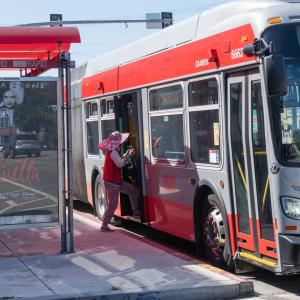

In [19]:
IImage(filename=f'{test_dir}/7464.jpg', width = 300, height = 200) 

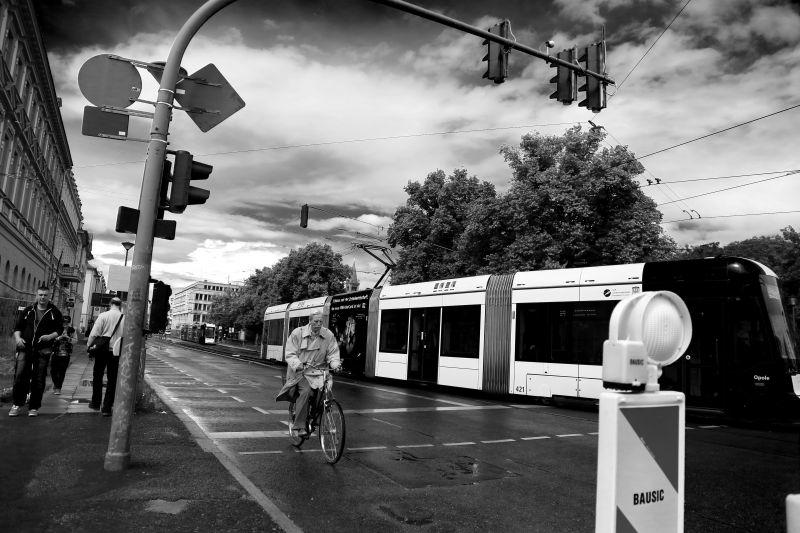

In [20]:
IImage(filename=f'{train_dir}/0.jpg', width = 300, height = 200) 

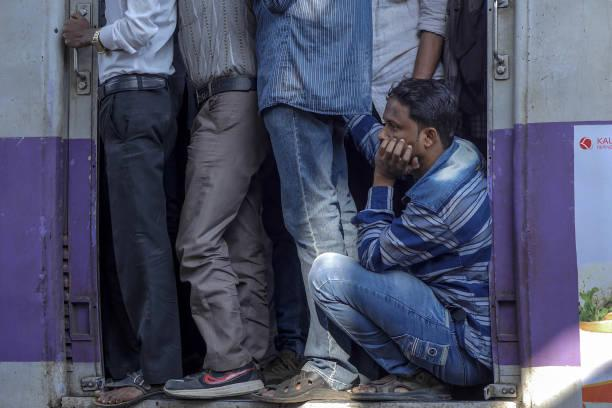

In [21]:
IImage(filename=f'{val_dir}/5680.jpg', width = 300, height = 200) 

In [22]:
def to_list(caption):
    return [caption]

In [23]:
del df_t['image']
df_t.rename(columns = {'path':'image'}, inplace = True)
# df_t['caption'] = df_t.apply(lambda x: to_list(x.caption), axis=1)
df_t

,image_id,id,caption,image
0,0,0,outdoor person black and white people road white,train/0.jpg
1,1,1,Singapore singapore march 1 2016 sentosa expr...,train/1.jpg
2,2,2,Zengchong dong village guizhou province china ...,train/2.jpg
3,3,3,Workers quivered readiness rail on Mas Rapid T...,train/3.jpg
4,4,4,Roundabouts Congestion Strategy,train/4.jpg
...,...,...,...,...
5673,5673,5673,JPEG image of the Sweet Street Park entrance s...,train/5673.jpg
5674,5674,5674,Vertical perspective view along the pedestrian...,train/5674.jpg
5675,5675,5675,tree pedestrian city downtown plaza park,train/5675.jpg
5676,5676,5676,In the forest two pedestrian paths merged into...,train/5676.jpg


In [24]:
def to_str(image_id):
    return str(image_id)

In [25]:
df_t = df_t[['caption', 'image', 'image_id']]
df_t['image_id'] = df_t.apply(lambda x: to_str(x.image_id), axis=1)
df_t

/tmp/ipykernel_19297/3071572063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['image_id'] = df_t.apply(lambda x: to_str(x.image_id), axis=1)


,caption,image,image_id
0,outdoor person black and white people road white,train/0.jpg,0
1,Singapore singapore march 1 2016 sentosa expr...,train/1.jpg,1
2,Zengchong dong village guizhou province china ...,train/2.jpg,2
3,Workers quivered readiness rail on Mas Rapid T...,train/3.jpg,3
4,Roundabouts Congestion Strategy,train/4.jpg,4
...,...,...,...
5673,JPEG image of the Sweet Street Park entrance s...,train/5673.jpg,5673
5674,Vertical perspective view along the pedestrian...,train/5674.jpg,5674
5675,tree pedestrian city downtown plaza park,train/5675.jpg,5675
5676,In the forest two pedestrian paths merged into...,train/5676.jpg,5676


In [26]:
df_t.at[0, 'caption']

'outdoor person black and white people road white'

In [27]:
del df_v['image']
df_v.rename(columns = {'path':'image'}, inplace = True)
df_v['caption'] = df_v.apply(lambda x: to_list(x.caption), axis=1)
df_v

,image_id,id,caption,image
0,5678,5678,[Singapore May2020 COVID19 Commuters in altern...,val/5678.jpg
1,5679,5679,[Passengers stand in a doorway of a train carr...,val/5679.jpg
2,5680,5680,[Passenger sits as others stand in the doorway...,val/5680.jpg
3,5681,5681,[Carriage rides make for great history lesson ...,val/5681.jpg
4,5682,5682,[Mini Police Style Patrol Sightseeing Utility ...,val/5682.jpg
...,...,...,...,...
1130,6808,6808,[Innherred a hiking friendly destination],val/6808.jpg
1131,6809,6809,[best walking trails old forest loop],val/6809.jpg
1132,6810,6810,[Gully Brook Park],val/6810.jpg
1133,6811,6811,[A car illegally parked on a pedestrian crossing],val/6811.jpg


In [28]:
df_v = df_v[['caption', 'image']]
df_v

,caption,image
0,[Singapore May2020 COVID19 Commuters in altern...,val/5678.jpg
1,[Passengers stand in a doorway of a train carr...,val/5679.jpg
2,[Passenger sits as others stand in the doorway...,val/5680.jpg
3,[Carriage rides make for great history lesson ...,val/5681.jpg
4,[Mini Police Style Patrol Sightseeing Utility ...,val/5682.jpg
...,...,...
1130,[Innherred a hiking friendly destination],val/6808.jpg
1131,[best walking trails old forest loop],val/6809.jpg
1132,[Gully Brook Park],val/6810.jpg
1133,[A car illegally parked on a pedestrian crossing],val/6811.jpg


In [29]:
del df_test['image']
df_test.rename(columns = {'path':'image'}, inplace = True)
df_test['caption'] = df_test.apply(lambda x: to_list(x.caption), axis=1)
df_test

,image_id,id,caption,image
0,6813,6813,[Artist renderings of enhanced bus lanes and p...,test/6813.jpg
1,6814,6814,[Cushman Shuttle 6 6 Passenger Vehicle],test/6814.jpg
2,6815,6815,[Unauthorized carriage background Group of peo...,test/6815.jpg
3,6816,6816,[Taxis an Uber other cars and people walking i...,test/6816.jpg
4,6817,6817,[SINGAPORE FEB 132014 Label map diagram insid...,test/6817.jpg
...,...,...,...,...
645,8107,8107,[Westown Commons picnic shelter front view],test/8107.jpg
646,8108,8108,[Humboldt Alexander Von Park],test/8108.jpg
647,8109,8109,[photo of trees and the fenceline at Mason Hil...,test/8109.jpg
648,8110,8110,[Hogback Ridge Park ],test/8110.jpg


In [67]:
df_test

,caption,image
0,[Artist renderings of enhanced bus lanes and p...,test/6813.jpg
1,[Cushman Shuttle 6 6 Passenger Vehicle],test/6814.jpg
2,[Unauthorized carriage background Group of peo...,test/6815.jpg
3,[Taxis an Uber other cars and people walking i...,test/6816.jpg
4,[SINGAPORE FEB 132014 Label map diagram insid...,test/6817.jpg
...,...,...
645,[Westown Commons picnic shelter front view],test/8107.jpg
646,[Humboldt Alexander Von Park],test/8108.jpg
647,[photo of trees and the fenceline at Mason Hil...,test/8109.jpg
648,[Hogback Ridge Park ],test/8110.jpg


In [30]:
df_test = df_test[['caption', 'image']]
df_test

,caption,image
0,[Artist renderings of enhanced bus lanes and p...,test/6813.jpg
1,[Cushman Shuttle 6 6 Passenger Vehicle],test/6814.jpg
2,[Unauthorized carriage background Group of peo...,test/6815.jpg
3,[Taxis an Uber other cars and people walking i...,test/6816.jpg
4,[SINGAPORE FEB 132014 Label map diagram insid...,test/6817.jpg
...,...,...
645,[Westown Commons picnic shelter front view],test/8107.jpg
646,[Humboldt Alexander Von Park],test/8108.jpg
647,[photo of trees and the fenceline at Mason Hil...,test/8109.jpg
648,[Hogback Ridge Park ],test/8110.jpg


In [31]:
import json

In [32]:
train_json_data = df_t.to_dict('records')
train_json_data

[{'caption': 'outdoor person black and white people road white',
  'image': 'train/0.jpg',
  'image_id': '0'},
 {'caption': 'Singapore singapore  march 1 2016 sentosa express monorail train connecting harborfront and sentosa island in singapore evening Stock Photo',
  'image': 'train/1.jpg',
  'image_id': '1'},
 {'caption': 'Zengchong dong village guizhou province china  april 11 2010 chinese farmers a man and a woman returning from field work in a cart pulled by a horse a mountain dirt road Editorial',
  'image': 'train/2.jpg',
  'image_id': '2'},
 {'caption': 'Workers quivered readiness rail on Mas Rapid Transiting at the station to HI Jakarta June 2016 Mass Progres construction of mass rapid transit',
  'image': 'train/3.jpg',
  'image_id': '3'},
 {'caption': 'Roundabouts Congestion Strategy',
  'image': 'train/4.jpg',
  'image_id': '4'},
 {'caption': 'A close up shot of delman horse carriage Taken in Malioboro street yogyakarta Indonesia transportation white horses market road trad

In [33]:
val_json_data = df_v.to_dict('records')
val_json_data

[{'caption': ['Singapore May2020 COVID19 Commuters in alternate seats in uncrowded MRT train during circuit breaker coronavirus outbreak social distancing rules Sunlit cabin carriage'],
  'image': 'val/5678.jpg'},
 {'caption': ['Passengers stand in a doorway of a train carriage as they travel by rail in Mumbai India on Saturday Jan 27 2018 Mumbais suburban railway the'],
  'image': 'val/5679.jpg'},
 {'caption': ['Passenger sits as others stand in the doorway of a train carriage as the train arrives at Kurla railway station in Mumbai India on Saturday Jan'],
  'image': 'val/5680.jpg'},
 {'caption': ['Carriage rides make for great history lesson in Charleston SCunless you are a bride and groom wanting to use it for other reasons'],
  'image': 'val/5681.jpg'},
 {'caption': ['Mini Police Style Patrol Sightseeing Utility Car 2 4 seats Electric Scooter Golf buggy cart vehicle'],
  'image': 'val/5682.jpg'},
 {'caption': ['Transit Street Design Guide Index'], 'image': 'val/5683.jpg'},
 {'capti

In [34]:
test_json_data = df_test.to_dict('records')
test_json_data

[{'caption': ['Artist renderings of enhanced bus lanes and pedestrian waiting areas at the ChicagoMilwaukeeOgden intersection'],
  'image': 'test/6813.jpg'},
 {'caption': ['Cushman Shuttle 6 6 Passenger Vehicle'],
  'image': 'test/6814.jpg'},
 {'caption': ['Unauthorized carriage background Group of people transporting in the truck Stock Footage'],
  'image': 'test/6815.jpg'},
 {'caption': ['Taxis an Uber other cars and people walking in congested downtown San Francisco'],
  'image': 'test/6816.jpg'},
 {'caption': ['SINGAPORE  FEB 132014 Label map diagram inside electric train on Feb 13 2014 in Singapore electric train of singapore Operations by Mass Rapid Transit Singapore MRT '],
  'image': 'test/6817.jpg'},
 {'caption': ['SINGAPORE  JAN 13 2017 Passengers in Singapore Mass Rapid Transit MRT train The MRT has 102 stations and is the secondoldest metro system in Southeast Asia'],
  'image': 'test/6818.jpg'},
 {'caption': ['Passengers on board'], 'image': 'test/6819.jpg'},
 {'caption': 

In [35]:
with open("fat_train.json", "w") as final:
    json.dump(train_json_data, final)

In [36]:
with open("fat_val.json", "w") as final:
    json.dump(val_json_data, final)

In [37]:
with open("fat_test.json", "w") as final:
    json.dump(test_json_data, final)

In [77]:
! ls

clip_caption	fat_val.json	      lavis_test_codes.ipynb  tsv2json.ipynb
fat_test.json	inference_test.ipynb  lavis_test.ipynb
fat_train.json	LAVIS		      open_clip


In [78]:
! ls LAVIS/cache/heat/annotations/

heat_test.json	heat_train.json  heat_val.json


In [79]:
! cp fat_train.json LAVIS/cache/heat/annotations/heat_train.json
! cp fat_test.json LAVIS/cache/heat/annotations/heat_test.json
! cp fat_val.json LAVIS/cache/heat/annotations/heat_val.json